In [1]:
library(tidytext)

sentiments

word,sentiment,lexicon,score
abacus,trust,nrc,NA
abandon,fear,nrc,NA
abandon,negative,nrc,NA
abandon,sadness,nrc,NA
abandoned,anger,nrc,NA
abandoned,fear,nrc,NA
abandoned,negative,nrc,NA
abandoned,sadness,nrc,NA
abandonment,anger,nrc,NA
abandonment,fear,nrc,NA


In [2]:
library(janeaustenr)
library(dplyr)
library(stringr)

tidy_books <- austen_books() %>%
  group_by(book) %>%
  mutate(linenumber = row_number(),
         chapter = cumsum(str_detect(text, regex("^chapter [\\divxlc]",
                                                 ignore_case = TRUE)))) %>%
  ungroup() %>%
  unnest_tokens(word, text)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'bindrcpp' was built under R version 3.4.4"

In [4]:
nrcjoy <- get_sentiments("nrc") %>%
  filter(sentiment == "joy")

tidy_books %>%
  filter(book == "Emma") %>%
  inner_join(nrcjoy) %>%
  count(word, sort = TRUE)

Joining, by = "word"


word,n
good,359
young,192
friend,166
hope,143
happy,125
love,117
deal,92
found,92
present,89
kind,82


In [5]:
library(tidyr)

janeaustensentiment <- tidy_books %>%
  inner_join(get_sentiments("bing")) %>%
  count(book, index = linenumber %/% 80, sentiment) %>%
  spread(sentiment, n, fill = 0) %>%
  mutate(sentiment = positive - negative)

Warning message:
"package 'tidyr' was built under R version 3.4.4"Joining, by = "word"


Warning message:
"package 'ggplot2' was built under R version 3.4.4"

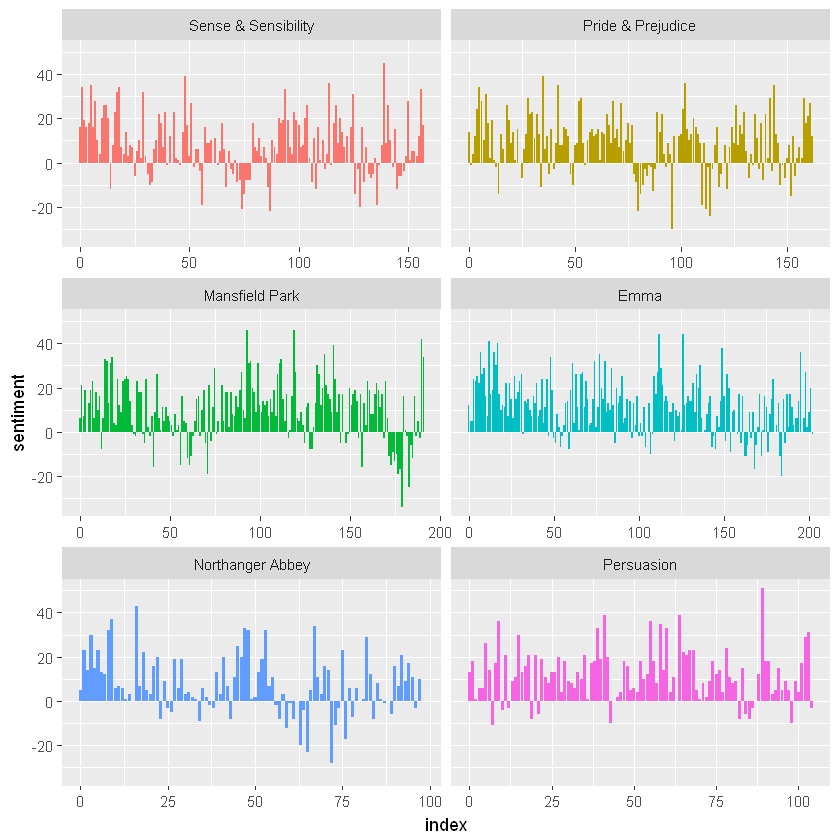

In [6]:
library(ggplot2)

ggplot(janeaustensentiment, aes(index, sentiment, fill = book)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~book, ncol = 2, scales = "free_x")